In [ ]:
%load_ext autoreload

In [ ]:
!git clone https://github.com/MikhailKitikov/aanet.git

In [ ]:
cd aanet/nets/deform_conv

In [ ]:
!bash build.sh

In [ ]:
cd ../..

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1Qa1rSWQDBcW4D6LvvjDztfTLNGA_rgGn&export=download
!gdown https://drive.google.com/u/0/uc?id=1m0z8e2Ndau_eFR3BETffzjkNXhJNHAiS&export=download

In [ ]:
!bash scripts/aanet+_predict.sh

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

left_img = cv2.imread('demo/left/000151_10.png', cv2.IMREAD_COLOR)
disp_img = cv2.imread('demo/pred/000151_10_pred.png')[..., 0]

left_img = cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB)

left_img = left_img[:, 300:-300, :]
disp_img = disp_img[:, 300:-300]

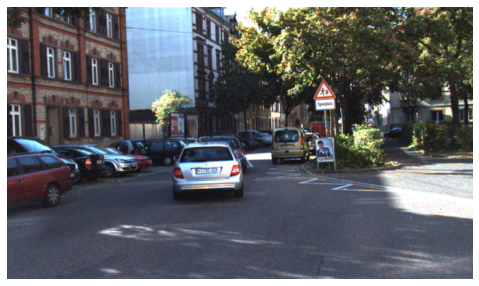

In [ ]:
plt.figure(figsize=(9, 5))
plt.axis('off')
plt.imshow(left_img)
plt.show()

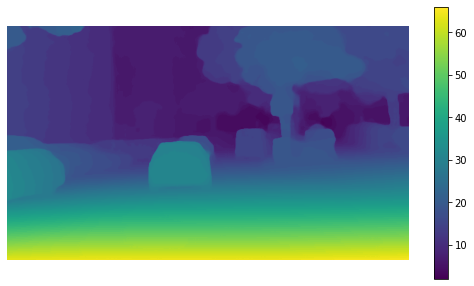

In [ ]:
plt.figure(figsize=(9, 5))
plt.axis('off')
plt.imshow(disp_img)
plt.colorbar()
plt.show()

In [ ]:
import kitti_util as utils

calib = utils.Calibration('calib.txt')
focal_len = calib.f_u
baseline = 0.54
im_size = max(disp_img.shape)

disp_float = disp_img.astype(float)# / 256

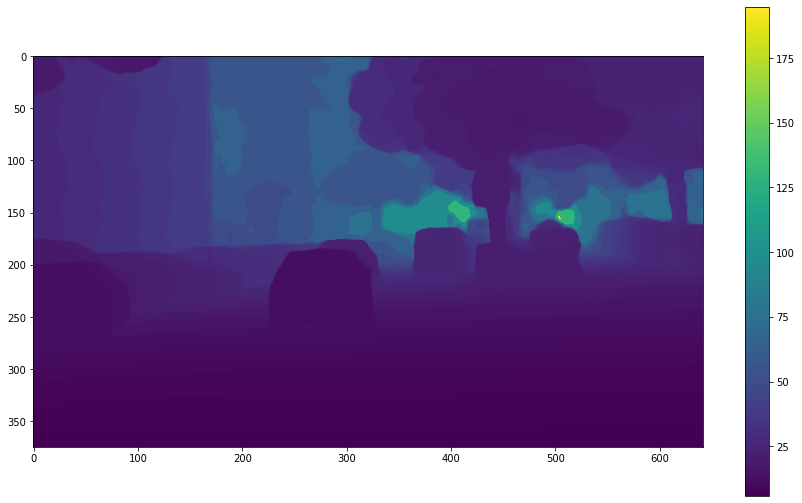

In [ ]:
depth = baseline * focal_len / (disp_float)

plt.figure(figsize=(15, 9))
plt.imshow(depth)
plt.colorbar()
plt.show()

In [ ]:
xx, yy = np.meshgrid(np.arange(depth.shape[1]), np.arange(depth.shape[0]))
xx, yy = xx.astype(float), yy.astype(float)
xx, yy = yy, xx

xyz = np.stack([xx, yy, depth], axis=2)
velo_pts = xyz.reshape((-1, 3))
velo_pts = calib.project_image_to_velo(velo_pts)

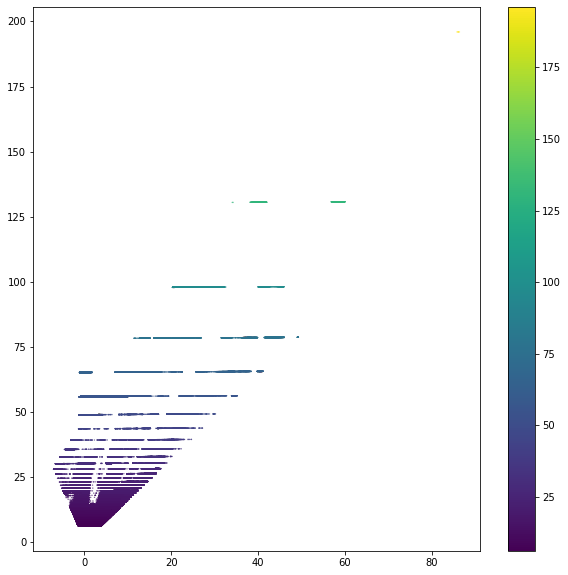

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(-velo_pts[:, 2], velo_pts[:, 0], c=velo_pts[:, 0], s=0.1)
plt.colorbar()
# plt.ylim(-5, 70)
# plt.xlim(-20, 50)
plt.show()